In [10]:
import numpy as np
import pandas as pd

df=pd.read_csv("/Users/vineethpetnakota/documents/IS_698/Musical_instruments_reviews.csv",encoding="unicode_escape")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [11]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


# Preprocessing and cleaning


In [12]:
#Creating a copy
process_reviews=df.copy()

#Checking for null values
process_reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [14]:
process_reviews['reviewText']=process_reviews['reviewText'].fillna('Missing')

In [15]:
#Concatenating review text and summary

process_reviews['reviews']=process_reviews['reviewText']+process_reviews['summary']
process_reviews=process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


# Creating a sentiment Column

In [16]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [17]:
def sentiment(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [18]:
#Applying the function in our new column
process_reviews['sentiment'] = process_reviews.apply(sentiment, axis=1)
process_reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualize
from textblob import TextBlob
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import re
import wordcloud
from PIL import Image


# Visual representation of overall sentiment

<AxesSubplot:xlabel='sentiment', ylabel='count'>

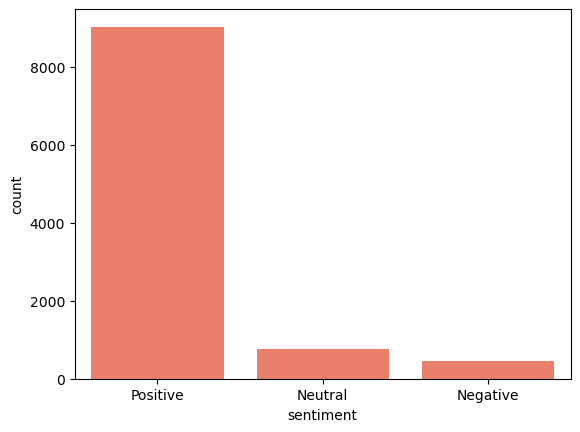

In [22]:
sns.countplot(x=process_reviews["sentiment"], color = '#FF7256')

In [43]:
import string
import re

def review_cleaning(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Assuming 'process_reviews' is a DataFrame with a column 'reviews'
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: review_cleaning(x))
process_reviews.head()

,reviewerID,asin,helpful,overall,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"02 28, 2014",Not much to write about here but it does exact...,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,"02 21, 2014",This pop filter is great It looks and performs...,Positive


In [45]:
'''In terms of stop words, general nltk stop words include phrases like "not," "hasn't," and "wouldn't," all of 
which genuinely convey negativity. That will ultimately contradict the target variable (sentiment) if we eliminate 
it. Therefore, I have chosen stop words that don't have any connotations or unfavorable alternatives.'''

stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [46]:
process_reviews['reviews'] = process_reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
process_reviews.head()

,reviewerID,asin,helpful,overall,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"02 28, 2014",Not much write but exactly supposed filters po...,Positive
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,"03 16, 2013",The product exactly quite affordableI not real...,Positive
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,"08 28, 2013",The primary job device block breath would othe...,Positive
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,"02 14, 2014",Nice windscreen protects MXL mic prevents pops...,Positive
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,"02 21, 2014",This pop filter great It looks performs like s...,Positive


# Creating few more features for text analysis

In [47]:
#adding columns polarity,review_len and wordcount to the dataframe

process_reviews['polarity'] = process_reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
process_reviews['review_len'] = process_reviews['reviews'].astype(str).apply(len)
process_reviews['word_count'] = process_reviews['reviews'].apply(lambda x: len(str(x).split()))

In [48]:
process_reviews.head()

,reviewerID,asin,helpful,overall,reviewTime,reviews,sentiment,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5.0,"02 28, 2014",Not much write but exactly supposed filters po...,Positive,0.250000,162,25
1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5.0,"03 16, 2013",The product exactly quite affordableI not real...,Positive,0.014286,366,59
2,A195EZSQDW3E21,1384719342,"[1, 1]",5.0,"08 28, 2013",The primary job device block breath would othe...,Positive,0.167500,340,54
3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5.0,"02 14, 2014",Nice windscreen protects MXL mic prevents pops...,Positive,0.250000,182,25
4,A94QU4C90B1AX,1384719342,"[0, 0]",5.0,"02 21, 2014",This pop filter great It looks performs like s...,Positive,0.800000,146,24


# sentiment polarity distribution

In [50]:
import cufflinks as cf
import plotly
import plotly.offline as pyo

# Configure Plotly to work in a notebook
pyo.init_notebook_mode(connected=True)

# Configure cufflinks with offline mode
cf.go_offline()


process_reviews['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

# Review Rating Distribution

In [52]:
process_reviews['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

# Word cloud for reviews

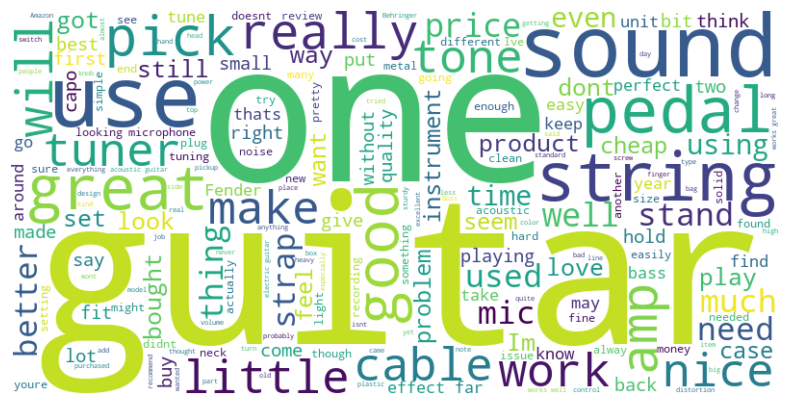

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


text_column = process_reviews['reviews']

# Concatenate the text from the selected column
text = ' '.join(text_column)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()